In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


In [3]:
data = load_breast_cancer()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
from sklearn.preprocessing import StandardScaler # this is used for scaling the data meaning that we will scale the data to have mean 0 and standard deviation 1
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [12]:
scaler_data = scaler.transform(df)

In [13]:
scaler_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # we want to reduce the data to 2 dimensions
pca.fit(scaler_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaler_data)
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [16]:
x_pca.shape

(569, 2)

In [17]:
scaler_data.shape

(569, 30)

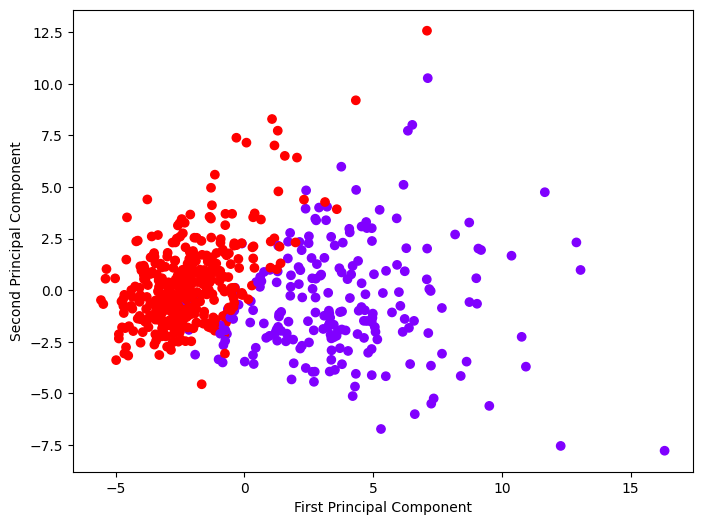

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['target'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')    
plt.show()

In [21]:
# prompt: create a pca with prediction 

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


In [22]:
iris = load_iris()

In [23]:
x= iris.data
y = iris.target

In [24]:
# split data into training and tesing 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
pca_logistic_pipeline = make_pipeline(
    PCA(n_components='mle'),LogisticRegression(max_iter=1000))
pca_logistic_pipeline.fit(x_train, y_train)


Pipeline(steps=[('pca', PCA(n_components='mle')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [26]:
y_pred = pca_logistic_pipeline.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)

In [28]:
print(f"Accuracy with PCA and Logistic Regression: {accuracy}")


Accuracy with PCA and Logistic Regression: 1.0


In [29]:
pca_model = pca_logistic_pipeline.named_steps['pca']
print(f"\nExplained variance ratio: {pca_model.explained_variance_ratio_}")
print(f"Number of components used: {pca_model.n_components_}")


Explained variance ratio: [0.9191876  0.05549301 0.02010131]
Number of components used: 3
